# **Customer Segmentation Using Cluster Analysis (EDA)**

---

*   *S/17/403 - Sumedha Kulasekara*
*   *S/17/404 - Lasantha Kulsooriya*



In [ ]:
!pip install datetimerange
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U kaleido
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install jovian opendatasets --upgrade --quiet

!pip install numpy pandas matplotlib.pyplot seaborn  --upgrade --quite

!pip install plotly --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 KB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --quite
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 48.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
pip install datetimerange

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install matplotlib==3.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 53.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3


**Importing Packages & Libraries**

In [ ]:
import numpy as np
import pandas as pd
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.io as pio
pio.templates
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import kaleido
import datetime
from datetimerange import DateTimeRange
import json
import os

from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import norm
from scipy.stats import skew, norm, probplot, boxcox
from sklearn import preprocessing
import math

from sklearn.cluster import KMeans
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
#from yellowbrick.cluster import SilhouetteVisualizer

#import Orange
#from Orange.data import Domain, DiscreteVariable, ContinuousVariable
#from orangecontrib.associate.fpgrowth import*

In [ ]:
import matplotlib.style as style

style.use('seaborn-poster')
style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'serif'
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : True})



**Importing the Dataset**

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxx' 

download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('Amazon Sales FY2020-21.csv')

#Import file
amazon_sales_df  = pd.read_csv("Amazon Sales FY2020-21.csv", low_memory = False)

#First 5 observations
amazon_sales_df.head()

order_id  order_date    status  item_id                  sku  qty_ordered  \
0  100354678  01/10/2020  received   574772   oasis_Oasis-064-36           21   
1  100354678  01/10/2020  received   574774      Fantastic_FT-48           11   
2  100354680  01/10/2020  complete   574777      mdeal_DMC-610-8            9   
3  100354680  01/10/2020  complete   574779   oasis_Oasis-061-36            9   
4  100367357  13/11/2020  received   595185  MEFNAR59C38B6CA08CD            2   

   price   value  discount_amount   total  ... Sign in date    Phone No.   \
0   89.9  1798.0              0.0  1798.0  ...    8/22/2006  405-959-1129   
1   19.0   190.0              0.0   190.0  ...    8/22/2006  405-959-1129   
2  149.9  1199.2              0.0  1199.2  ...    8/22/2006  405-959-1129   
3   79.9   639.2              0.0   639.2  ...    8/22/2006  405-959-1129   
4   99.9    99.9              0.0    99.9  ...    8/22/2006  405-959-1129   

  Place Name  County    City State    Zip Region User Name Discount_Percent  
0     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
1     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
2     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
3     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
4     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  

[5 rows x 35 columns]

**Changing the Column Names**

In [ ]:
column_names=['Order_Id', 'Order_Date', 'Status', 'Item_Id', 'SKU', 'Quantity_Ordered', 'Price', 'Value', 'Discount_Amount',
           'Total', 'Category', 'Payment_Method', 'By_St', 'Customer_Id', 'Year', 'Month',
           'Ref_Number', 'Name_Prefix', 'First_Name', 'Middle_Initial', 'Last_Name', 'Gender', 
           'Age', 'Full_Name', 'Email', 'Signed_Date', 'Phone_Number', 'Place_Name', 'County',
           'City', 'State', 'Zip_Code', 'Region', 'User_Name', 'Discount_Percent']
amazon_sales_df.columns = column_names;
pd.set_option('display.max_columns', None)
amazon_sales_df.head()

Order_Id  Order_Date    Status  Item_Id                  SKU  \
0  100354678  01/10/2020  received   574772   oasis_Oasis-064-36   
1  100354678  01/10/2020  received   574774      Fantastic_FT-48   
2  100354680  01/10/2020  complete   574777      mdeal_DMC-610-8   
3  100354680  01/10/2020  complete   574779   oasis_Oasis-061-36   
4  100367357  13/11/2020  received   595185  MEFNAR59C38B6CA08CD   

   Quantity_Ordered  Price   Value  Discount_Amount   Total       Category  \
0                21   89.9  1798.0              0.0  1798.0  Men's Fashion   
1                11   19.0   190.0              0.0   190.0  Men's Fashion   
2                 9  149.9  1199.2              0.0  1199.2  Men's Fashion   
3                 9   79.9   639.2              0.0   639.2  Men's Fashion   
4                 2   99.9    99.9              0.0    99.9  Men's Fashion   

  Payment_Method  By_St  Customer_Id  Year   Month  Ref_Number Name_Prefix  \
0            cod  Valid        60124  2020  Oct-20      987867        Drs.   
1            cod  Valid        60124  2020  Oct-20      987867        Drs.   
2            cod    Net        60124  2020  Oct-20      987867        Drs.   
3            cod    Net        60124  2020  Oct-20      987867        Drs.   
4            cod  Valid        60124  2020  Nov-20      987867        Drs.   

  First_Name Middle_Initial Last_Name Gender  Age    Full_Name  \
0       Jani              W     Titus      F   43  Titus, Jani   
1       Jani              W     Titus      F   43  Titus, Jani   
2       Jani              W     Titus      F   43  Titus, Jani   
3       Jani              W     Titus      F   43  Titus, Jani   
4       Jani              W     Titus      F   43  Titus, Jani   

                  Email Signed_Date  Phone_Number Place_Name  County    City  \
0  jani.titus@gmail.com   8/22/2006  405-959-1129     Vinson  Harmon  Vinson   
1  jani.titus@gmail.com   8/22/2006  405-959-1129     Vinson  Harmon  Vinson   
2  jani.titus@gmail.com   8/22/2006  405-959-1129     Vinson  Harmon  Vinson   
3  jani.titus@gmail.com   8/22/2006  405-959-1129     Vinson  Harmon  Vinson   
4  jani.titus@gmail.com   8/22/2006  405-959-1129     Vinson  Harmon  Vinson   

  State  Zip_Code Region User_Name  Discount_Percent  
0    OK     73571  South   jwtitus               0.0  
1    OK     73571  South   jwtitus               0.0  
2    OK     73571  South   jwtitus               0.0  
3    OK     73571  South   jwtitus               0.0  
4    OK     73571  South   jwtitus               0.0

**Dimensions of the Dataset**

In [ ]:
amazon_sales_df.ndim

2

Dataset is 2 dimention. Which is a dataframe.

In [ ]:
amazon_sales_df.shape

(286392, 35)

Dataset contains 286392 observations in 35 variables.

**Structure of the Dataset**

In [ ]:
#Datatypes and null count
amazon_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_Id          286392 non-null  object 
 1   Order_Date        286392 non-null  object 
 2   Status            286392 non-null  object 
 3   Item_Id           286392 non-null  int64  
 4   SKU               286392 non-null  object 
 5   Quantity_Ordered  286392 non-null  int64  
 6   Price             286392 non-null  float64
 7   Value             286392 non-null  float64
 8   Discount_Amount   286392 non-null  float64
 9   Total             286392 non-null  float64
 10  Category          286392 non-null  object 
 11  Payment_Method    286392 non-null  object 
 12  By_St             286392 non-null  object 
 13  Customer_Id       286392 non-null  int64  
 14  Year              286392 non-null  int64  
 15  Month             286392 non-null  object 
 16  Ref_Number        28

In [ ]:
#Datatypes count
amazon_sales_df.dtypes.value_counts()

object     23
int64       7
float64     5
dtype: int64

Dataset contains 35 variables including 23 categorical variables and 12 numerical variables which contains 7 integer variables and 5 decimal variables.

**Null Values**

In [ ]:
amazon_sales_df.isna().sum()

Order_Id            0
Order_Date          0
Status              0
Item_Id             0
SKU                 0
Quantity_Ordered    0
Price               0
Value               0
Discount_Amount     0
Total               0
Category            0
Payment_Method      0
By_St               0
Customer_Id         0
Year                0
Month               0
Ref_Number          0
Name_Prefix         0
First_Name          0
Middle_Initial      0
Last_Name           0
Gender              0
Age                 0
Full_Name           0
Email               0
Signed_Date         0
Phone_Number        0
Place_Name          0
County              0
City                0
State               0
Zip_Code            0
Region              0
User_Name           0
Discount_Percent    0
dtype: int64

There are no null values.

**Duplicate Values**

In [ ]:
amazon_sales_df.duplicated().sum()

0

There are no duplicated values in this dataset.

**Unique Values**

In [ ]:
amazon_sales_df.nunique()

Order_Id            201716
Order_Date             365
Status                  13
Item_Id             286392
SKU                  47932
Quantity_Ordered        72
Price                 7561
Value                10607
Discount_Amount      13732
Total                23755
Category                15
Payment_Method          13
By_St                    3
Customer_Id          64248
Year                     2
Month                   12
Ref_Number           62065
Name_Prefix              7
First_Name            5161
Middle_Initial          26
Last_Name            18208
Gender                   2
Age                     58
Full_Name            64212
Email                64246
Signed_Date          11647
Phone_Number         64248
Place_Name           15892
County                2551
City                 15892
State                   51
Zip_Code             33773
Region                   4
User_Name            64006
Discount_Percent     17009
dtype: int64

### **Data Preprocessing**



---



**Analyzing Discounts and Total Value**





In [ ]:
#Making new dataframe with selected columns
new_df = amazon_sales_df[['Order_Id', 'Quantity_Ordered', 'Price', 'Value', 'Discount_Amount', 'Total']]
pd.set_option('mode.chained_assignment', None)
new_df['New_Value']=new_df['Quantity_Ordered']*new_df["Price"]
new_df['New_Total'] = new_df['New_Value'] - new_df['Discount_Amount']
new_df.head(10)

Order_Id  Quantity_Ordered  Price   Value  Discount_Amount   Total  \
0  100354678                21   89.9  1798.0              0.0  1798.0   
1  100354678                11   19.0   190.0              0.0   190.0   
2  100354680                 9  149.9  1199.2              0.0  1199.2   
3  100354680                 9   79.9   639.2              0.0   639.2   
4  100367357                 2   99.9    99.9              0.0    99.9   
5  100367357                 2   39.9    39.9              0.0    39.9   
6  100367360                 2   47.6    47.6              0.0    47.6   
7  100354677                 2   49.0    49.0              0.0    49.0   
8  100354677                 2  135.0   135.0              0.0   135.0   
9  100354677                 2  549.9   549.9              0.0   549.9   

   New_Value  New_Total  
0     1887.9     1887.9  
1      209.0      209.0  
2     1349.1     1349.1  
3      719.1      719.1  
4      199.8      199.8  
5       79.8       79.8  
6       95.2       95.2  
7       98.0       98.0  
8      270.0      270.0  
9     1099.8     1099.8

In [ ]:
#Marking discounted values
new_df['Is_Discounted'] = np.where(new_df['Discount_Amount'] > 0 , True, False)
new_df.head(10)

Order_Id  Quantity_Ordered  Price   Value  Discount_Amount   Total  \
0  100354678                21   89.9  1798.0              0.0  1798.0   
1  100354678                11   19.0   190.0              0.0   190.0   
2  100354680                 9  149.9  1199.2              0.0  1199.2   
3  100354680                 9   79.9   639.2              0.0   639.2   
4  100367357                 2   99.9    99.9              0.0    99.9   
5  100367357                 2   39.9    39.9              0.0    39.9   
6  100367360                 2   47.6    47.6              0.0    47.6   
7  100354677                 2   49.0    49.0              0.0    49.0   
8  100354677                 2  135.0   135.0              0.0   135.0   
9  100354677                 2  549.9   549.9              0.0   549.9   

   New_Value  New_Total  Is_Discounted  
0     1887.9     1887.9          False  
1      209.0      209.0          False  
2     1349.1     1349.1          False  
3      719.1      719.1          False  
4      199.8      199.8          False  
5       79.8       79.8          False  
6       95.2       95.2          False  
7       98.0       98.0          False  
8      270.0      270.0          False  
9     1099.8     1099.8          False

In [ ]:
#Marking wrong total values
new_df['Is_Correct_Total'] = np.where((new_df['Total'] == new_df['New_Total'] ), True, False)
new_df.head(10)

Order_Id  Quantity_Ordered  Price   Value  Discount_Amount   Total  \
0  100354678                21   89.9  1798.0              0.0  1798.0   
1  100354678                11   19.0   190.0              0.0   190.0   
2  100354680                 9  149.9  1199.2              0.0  1199.2   
3  100354680                 9   79.9   639.2              0.0   639.2   
4  100367357                 2   99.9    99.9              0.0    99.9   
5  100367357                 2   39.9    39.9              0.0    39.9   
6  100367360                 2   47.6    47.6              0.0    47.6   
7  100354677                 2   49.0    49.0              0.0    49.0   
8  100354677                 2  135.0   135.0              0.0   135.0   
9  100354677                 2  549.9   549.9              0.0   549.9   

   New_Value  New_Total  Is_Discounted  Is_Correct_Total  
0     1887.9     1887.9          False             False  
1      209.0      209.0          False             False  
2     1349.1     1349.1          False             False  
3      719.1      719.1          False             False  
4      199.8      199.8          False             False  
5       79.8       79.8          False             False  
6       95.2       95.2          False             False  
7       98.0       98.0          False             False  
8      270.0      270.0          False             False  
9     1099.8     1099.8          False             False

**Cross Table For Dicounts and Total**

In [ ]:
crosstab1 =pd.crosstab(new_df['Is_Discounted'], new_df['Is_Correct_Total'], margins = True)
print(crosstab1)

Is_Correct_Total   False  True     All
Is_Discounted                         
False             199084  1574  200658
True               85734     0   85734
All               284818  1574  286392


In [ ]:
crosstab2 =pd.crosstab(new_df['Is_Discounted'], new_df['Is_Correct_Total'], margins = True ,normalize = True).style.format('{:.2%}')
crosstab2

The two cross tables show that 85,734 customers, or 29.94% of all customers, received discounts. 200,658 customers  didn't get any discount, which is 70.06% from the total customers. And all the discounted customers have a wrong total. And from non-discounted customers, 69.51% customers total is wrong.

99.94% of values in Total column is wrong.

In [ ]:
new_df2 = new_df
new_df2['Total'] = np.where(new_df['Is_Correct_Total'] != True, new_df['New_Total'], new_df['Total'] )
new_df2['Is_Correct_Total'] = np.where((new_df2['Total'] == new_df2['New_Total'] ), True, False)
crosstab3 =pd.crosstab(new_df2['Is_Discounted'], new_df['Is_Correct_Total'], margins = True)
print(crosstab3)

Is_Correct_Total    True     All
Is_Discounted                   
False             200658  200658
True               85734   85734
All               286392  286392


In [ ]:
#Updating Correct Total values and 
amazon_sales_df['Total'] = new_df['Total']
amazon_sales_df['Value'] =  new_df['New_Value']
amazon_sales_df.head()

Order_Id  Order_Date    Status  Item_Id                  SKU  \
0  100354678  01/10/2020  received   574772   oasis_Oasis-064-36   
1  100354678  01/10/2020  received   574774      Fantastic_FT-48   
2  100354680  01/10/2020  complete   574777      mdeal_DMC-610-8   
3  100354680  01/10/2020  complete   574779   oasis_Oasis-061-36   
4  100367357  13/11/2020  received   595185  MEFNAR59C38B6CA08CD   

   Quantity_Ordered  Price   Value  Discount_Amount   Total       Category  \
0                21   89.9  1887.9              0.0  1887.9  Men's Fashion   
1                11   19.0   209.0              0.0   209.0  Men's Fashion   
2                 9  149.9  1349.1              0.0  1349.1  Men's Fashion   
3                 9   79.9   719.1              0.0   719.1  Men's Fashion   
4                 2   99.9   199.8              0.0   199.8  Men's Fashion   

  Payment_Method  By_St  Customer_Id  Year   Month  Ref_Number Name_Prefix  \
0            cod  Valid        60124  2020  Oct-20      987867        Drs.   
1            cod  Valid        60124  2020  Oct-20      987867        Drs.   
2            cod    Net        60124  2020  Oct-20      987867        Drs.   
3            cod    Net        60124  2020  Oct-20      987867        Drs.   
4            cod  Valid        60124  2020  Nov-20      987867        Drs.   

  First_Name Middle_Initial Last_Name Gender  Age    Full_Name  \
0       Jani              W     Titus      F   43  Titus, Jani   
1       Jani              W     Titus      F   43  Titus, Jani   
2       Jani              W     Titus      F   43  Titus, Jani   
3       Jani              W     Titus      F   43  Titus, Jani   
4       Jani              W     Titus      F   43  Titus, Jani   

                  Email Signed_Date  Phone_Number Place_Name  County    City  \
0  jani.titus@gmail.com   8/22/2006  405-959-1129     Vinson  Harmon  Vinson   
1  jani.titus@gmail.com   8/22/2006  405-959-1129     Vinson  Harmon  Vinson   
2  jani.titus@gmail.com   8/22/2006  405-959-1129     Vinson  Harmon  Vinson   
3  jani.titus@gmail.com   8/22/2006  405-959-1129     Vinson  Harmon  Vinson   
4  jani.titus@gmail.com   8/22/2006  405-959-1129     Vinson  Harmon  Vinson   

  State  Zip_Code Region User_Name  Discount_Percent  
0    OK     73571  South   jwtitus               0.0  
1    OK     73571  South   jwtitus               0.0  
2    OK     73571  South   jwtitus               0.0  
3    OK     73571  South   jwtitus               0.0  
4    OK     73571  South   jwtitus               0.0

In [ ]:
amazon_sales_df[amazon_sales_df['Discount_Amount']>0].head()

Order_Id  Order_Date    Status  Item_Id                  SKU  \
12  100403034  24/12/2020  canceled   656937  APPWES59CA4D59CB41A   
13  100403034  24/12/2020  canceled   656938  APPPHI5A09939191938   
14  100403034  24/12/2020  canceled   656939  HALSHO59F836EF959B9   
15  100403077  24/12/2020  canceled   657023  APPWES59CA4D59CB41A   
16  100403077  24/12/2020  canceled   657024  APPPHI5A09939191938   

    Quantity_Ordered  Price  Value  Discount_Amount      Total       Category  \
12                 2  254.8  509.6         39.80628  469.79372     Appliances   
13                 2  315.5  631.0         49.28917  581.71083     Appliances   
14                 2   69.8  139.6         10.90455  128.69545  Home & Living   
15                 2  254.8  509.6         39.80628  469.79372     Appliances   
16                 2  315.5  631.0         49.28917  581.71083     Appliances   

   Payment_Method  By_St  Customer_Id  Year   Month  Ref_Number Name_Prefix  \
12        Easypay  Gross        42485  2020  Dec-20      171143       Prof.   
13        Easypay  Gross        42485  2020  Dec-20      171143       Prof.   
14        Easypay  Gross        42485  2020  Dec-20      171143       Prof.   
15        Easypay  Gross        42485  2020  Dec-20      171143       Prof.   
16        Easypay  Gross        42485  2020  Dec-20      171143       Prof.   

   First_Name Middle_Initial Last_Name Gender  Age   Full_Name  \
12        Lee              S     Eaker      M   28  Eaker, Lee   
13        Lee              S     Eaker      M   28  Eaker, Lee   
14        Lee              S     Eaker      M   28  Eaker, Lee   
15        Lee              S     Eaker      M   28  Eaker, Lee   
16        Lee              S     Eaker      M   28  Eaker, Lee   

                  Email Signed_Date  Phone_Number Place_Name    County  \
12  lee.eaker@gmail.com  02/04/1981  239-335-6755     Graham  Bradford   
13  lee.eaker@gmail.com  02/04/1981  239-335-6755     Graham  Bradford   
14  lee.eaker@gmail.com  02/04/1981  239-335-6755     Graham  Bradford   
15  lee.eaker@gmail.com  02/04/1981  239-335-6755     Graham  Bradford   
16  lee.eaker@gmail.com  02/04/1981  239-335-6755     Graham  Bradford   

      City State  Zip_Code Region User_Name  Discount_Percent  
12  Graham    FL     32042  South   lseaker         15.622559  
13  Graham    FL     32042  South   lseaker         15.622558  
14  Graham    FL     32042  South   lseaker         15.622564  
15  Graham    FL     32042  South   lseaker         15.622559  
16  Graham    FL     32042  South   lseaker         15.622558

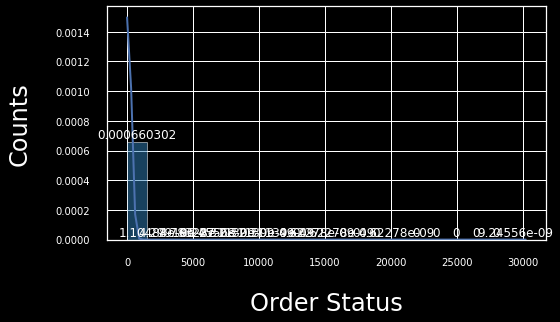

In [ ]:
mu, sigma = stats.norm.fit(amazon_sales_df['Discount_Amount'])

x_hat = np.linspace(min(amazon_sales_df['Discount_Amount']), max(amazon_sales_df['Discount_Amount']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=amazon_sales_df['Discount_Amount'], density=True, bins=20, color="#3182bd", alpha=0.5)
ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 12, color='white')
plt.xticks( fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Order Status', fontsize=24, labelpad=24, color='white')
plt.ylabel('Counts', fontsize=24, labelpad=24, color='white');
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white');

**Order Date & Signed Date**

In [ ]:
#Converting 'Order Date' in to datetime type
amazon_sales_df["Order_Date"] = pd.to_datetime(amazon_sales_df["Order_Date"])
print (amazon_sales_df["Order_Date"].dtypes)

datetime64[ns]


In [ ]:
#coverting 'Signed_Date' to datetime type
amazon_sales_df["Signed_Date"] = pd.to_datetime(amazon_sales_df["Signed_Date"])
print (amazon_sales_df["Signed_Date"].dtypes)

datetime64[ns]


**Check Time Period**

In [ ]:
df3 = amazon_sales_df
#Order Date
Order_date_range = DateTimeRange(df3['Order_Date'].dt.date.min(), df3['Order_Date'].dt.date.max())
"Order dates are from "+ str(Order_date_range)[0:10] +" to "+ str(Order_date_range)[22:32]

'Order dates are from 2020-01-10 to 2021-12-09'

In [ ]:
Order_date_range = DateTimeRange(df3['Signed_Date'].dt.date.min(), df3['Signed_Date'].dt.date.max())
"Signed dates are from "+ str(Order_date_range)[0:10] +" to "+ str(Order_date_range)[22:32]

'Signed dates are from 1978-11-04 to 2017-07-28'

Signed Dates cannot contain dates before 1994 . Because Amazon is founded in 1994 -07-05

In [ ]:
d=len(df3[df3['Signed_Date'] <= '1994-07-05' ])
c = (d/len(df3))*100
print(d,c)

28782 10.049861727981229


There are 28782 dates before 1994-07-05. Which is 10.05% of the total observations.

In [ ]:
amazon_sales_df.head()

Order_Id Order_Date    Status  Item_Id                  SKU  \
0  100354678 2020-01-10  received   574772   oasis_Oasis-064-36   
1  100354678 2020-01-10  received   574774      Fantastic_FT-48   
2  100354680 2020-01-10  complete   574777      mdeal_DMC-610-8   
3  100354680 2020-01-10  complete   574779   oasis_Oasis-061-36   
4  100367357 2020-11-13  received   595185  MEFNAR59C38B6CA08CD   

   Quantity_Ordered  Price   Value  Discount_Amount   Total       Category  \
0                21   89.9  1887.9              0.0  1887.9  Men's Fashion   
1                11   19.0   209.0              0.0   209.0  Men's Fashion   
2                 9  149.9  1349.1              0.0  1349.1  Men's Fashion   
3                 9   79.9   719.1              0.0   719.1  Men's Fashion   
4                 2   99.9   199.8              0.0   199.8  Men's Fashion   

  Payment_Method  By_St  Customer_Id  Year   Month  Ref_Number Name_Prefix  \
0            cod  Valid        60124  2020  Oct-20      987867        Drs.   
1            cod  Valid        60124  2020  Oct-20      987867        Drs.   
2            cod    Net        60124  2020  Oct-20      987867        Drs.   
3            cod    Net        60124  2020  Oct-20      987867        Drs.   
4            cod  Valid        60124  2020  Nov-20      987867        Drs.   

  First_Name Middle_Initial Last_Name Gender  Age    Full_Name  \
0       Jani              W     Titus      F   43  Titus, Jani   
1       Jani              W     Titus      F   43  Titus, Jani   
2       Jani              W     Titus      F   43  Titus, Jani   
3       Jani              W     Titus      F   43  Titus, Jani   
4       Jani              W     Titus      F   43  Titus, Jani   

                  Email Signed_Date  Phone_Number Place_Name  County    City  \
0  jani.titus@gmail.com  2006-08-22  405-959-1129     Vinson  Harmon  Vinson   
1  jani.titus@gmail.com  2006-08-22  405-959-1129     Vinson  Harmon  Vinson   
2  jani.titus@gmail.com  2006-08-22  405-959-1129     Vinson  Harmon  Vinson   
3  jani.titus@gmail.com  2006-08-22  405-959-1129     Vinson  Harmon  Vinson   
4  jani.titus@gmail.com  2006-08-22  405-959-1129     Vinson  Harmon  Vinson   

  State  Zip_Code Region User_Name  Discount_Percent  
0    OK     73571  South   jwtitus               0.0  
1    OK     73571  South   jwtitus               0.0  
2    OK     73571  South   jwtitus               0.0  
3    OK     73571  South   jwtitus               0.0  
4    OK     73571  South   jwtitus               0.0

# <u>**Data Exploration and Visualization**</u>

###**Correlation Matrix**

In [ ]:
data = amazon_sales_df
corr_matrix = data.corr()
print(corr_matrix)

                   Item_Id  Quantity_Ordered     Price     Value  \
Item_Id           1.000000          0.103074  0.072898  0.080684   
Quantity_Ordered  0.103074          1.000000 -0.103748 -0.047406   
Price             0.072898         -0.103748  1.000000  0.928751   
Value             0.080684         -0.047406  0.928751  1.000000   
Discount_Amount  -0.073722          0.021244  0.241494  0.350394   
Total             0.087966         -0.050068  0.932711  0.997643   
Customer_Id       0.413622         -0.012639  0.107743  0.119008   
Year              0.843113          0.119646  0.019229  0.032037   
Ref_Number        0.008687          0.011227 -0.001493 -0.004569   
Age              -0.006897          0.000552 -0.007935 -0.005570   
Zip_Code         -0.007635          0.005192 -0.000976 -0.002317   
Discount_Percent -0.133427          0.073697  0.053462  0.070997   

                  Discount_Amount     Total  Customer_Id      Year  \
Item_Id                 -0.073722  0.087966  

In [ ]:
corr = corr_matrix
fig = ff.create_annotated_heatmap(
    z=corr.to_numpy().round(2),
    x=list(corr.index.values),
    y=list(corr.columns.values),       
    xgap=3, ygap=3,
    zmin=-1, zmax=1,
    colorscale='dense',
    colorbar_thickness=30,
    colorbar_ticklen=3
   
)
fig.update_layout(title_text='<b>Correlation Matrix<b>',
                  title_x=0.5,
                  titlefont={'size': 24},
                  width=750, height=750,
                  xaxis_showgrid=False,
                  xaxis={'side': 'bottom','color': 'white'},
                  yaxis_showgrid=False,
                  yaxis={'color': 'white'},
                  yaxis_autorange='reversed',                   
                  paper_bgcolor='Black',
                  title_font_family="Sitka Small",
                  title_font_size= 35,
                  title_font_color= 'white',
)
                  
fig.show()

###**Monthwize Sales**

In [ ]:
by_month = pd.to_datetime(amazon_sales_df['Order_Date']).dt.to_period('M').value_counts().sort_index()
by_month.index = pd.PeriodIndex(by_month.index)
df_month = by_month.rename_axis('Month').reset_index(name='Counts')
df_month

Month  Counts
0   2020-01     964
1   2020-02     773
2   2020-03     888
3   2020-04     614
4   2020-05    1001
5   2020-06    2334
6   2020-07    1256
7   2020-08    1195
8   2020-09     852
9   2020-10    6488
10  2020-11   10203
11  2020-12   82611
12  2021-01   18180
13  2021-02    9240
14  2021-03   26123
15  2021-04   36301
16  2021-05   12974
17  2021-06   21412
18  2021-07   12917
19  2021-08   11143
20  2021-09   13617
21  2021-10    4830
22  2021-11    5598
23  2021-12    4878

In [ ]:
import kaleido
plt.figure(figsize=(10,8))
fig2 = go.Figure(data=go.Scatter(x=df_month['Month'].astype(dtype=str), 
                        y=df_month['Counts'],
                        marker_color='indianred', text="counts"))
fig2.update_layout({"title": 'Orders from Jan 2020 to Dec 2021',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Total Orders"},
                   "showlegend": False}, 
                   title_x =0.5,
                   width=1000,
                   height=600,
                   yaxis = dict(tickformat = "digits"),
                   template="plotly_dark",
                   title_font_family="Sitka Small",
                   title_font_size= 35,
                   )
fig2.update_xaxes(title_font_family="Sitka Small", title_font_size= 20)
fig2.update_yaxes(title_font_family="Sitka Small", title_font_size= 20)
fig2.write_image("by-month.png",format="png", scale=1,engine='kaleido')

fig2.show()

<Figure size 720x576 with 0 Axes>

In [ ]:
fig3 = go.Figure(data=go.Bar(x=df_month['Month'].astype(dtype=str), 
                        y=df_month['Counts'],
                        marker=dict(
                            color='aqua'), 
                        text=df_month['Month'].dt.strftime('%b')))

fig3.update_layout({"title": 'Orders from Jan 2020 to Dec 2021',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Total Orders"},
                   "showlegend": False}, 
                   title_x =0.5,
                   width=1000,
                   height=600,
                   yaxis = dict(tickformat = "digits"),
                   template="plotly_dark",
                   title_font_family="Sitka Small",
                   title_font_size= 35,
                   )
fig3.update_xaxes(title_font_family="Sitka Small", title_font_size= 20)
fig3.update_yaxes(title_font_family="Sitka Small", title_font_size= 20)
fig3.show()

## **Status**

---

In [ ]:
# Get the count of status
amazon_sales_df.groupby(['Status']).size
value_counts_status = amazon_sales_df['Status'].value_counts()
value_counts_status

canceled          112166
complete           88968
received           51775
order_refunded     25713
refund              3820
cod                 2851
paid                 756
closed               176
payment_review        57
pending               48
processing            33
holded                25
pending_paypal         4
Name: Status, dtype: int64

In [ ]:
status_counts = amazon_sales_df['Status'].value_counts().sort_values(ascending=False)

fig4 = go.Figure(go.Bar(
    x=status_counts.index,
    y=status_counts,
    marker=dict(
        color=px.colors.qualitative.Plotly,
    )))
fig4.update_layout({"title": 'No of Orders by Order Status',
                   "xaxis": {"title":"Order Status"},
                   "yaxis": {"title":" No of Orders"},
                   "showlegend": False}, 
                   title_x =0.5,
                   width=1000,
                   height=600,
                   yaxis = dict(tickformat = "digits"),
                   template="plotly_dark",
                   title_font_family="Sitka Small",
                   title_font_size= 35,
                   )
fig4.update_xaxes(title_font_family="Sitka Small", title_font_size= 20,tickangle=35)
fig4.update_yaxes(title_font_family="Sitka Small", title_font_size= 20)


fig4.show()

According to the bar chart Most of the orders have been canceled. Then the more orders have been completed.

##**Order Completed Customers and Order Canceled Customers**

In [ ]:
df = amazon_sales_df[amazon_sales_df['Status'].str.contains('complete')|amazon_sales_df['Status'].str.contains('canceled')]
df.head()

Order_Id Order_Date    Status  Item_Id                        SKU  \
2  100354680 2020-01-10  complete   574777            mdeal_DMC-610-8   
3  100354680 2020-01-10  complete   574779         oasis_Oasis-061-36   
7  100354677 2020-01-10  canceled   574769         GFE_19_USBLEDLight   
8  100354677 2020-01-10  canceled   574770  oasis_Kingston-32GB-DTIG4   
9  100354677 2020-01-10  canceled   574771             Geepas_GSB5420   

   Quantity_Ordered  Price   Value  Discount_Amount   Total  \
2                 9  149.9  1349.1              0.0  1349.1   
3                 9   79.9   719.1              0.0   719.1   
7                 2   49.0    98.0              0.0    98.0   
8                 2  135.0   270.0              0.0   270.0   
9                 2  549.9  1099.8              0.0  1099.8   

            Category Payment_Method  By_St  Customer_Id  Year   Month  \
2      Men's Fashion            cod    Net        60124  2020  Oct-20   
3      Men's Fashion            cod    Net        60124  2020  Oct-20   
7  Mobiles & Tablets        Payaxis  Gross        42485  2020  Oct-20   
8          Computing        Payaxis  Gross        42485  2020  Oct-20   
9         Appliances        Payaxis  Gross        42485  2020  Oct-20   

   Ref_Number Name_Prefix First_Name Middle_Initial Last_Name Gender  Age  \
2      987867        Drs.       Jani              W     Titus      F   43   
3      987867        Drs.       Jani              W     Titus      F   43   
7      171143       Prof.        Lee              S     Eaker      M   28   
8      171143       Prof.        Lee              S     Eaker      M   28   
9      171143       Prof.        Lee              S     Eaker      M   28   

     Full_Name                 Email Signed_Date  Phone_Number Place_Name  \
2  Titus, Jani  jani.titus@gmail.com  2006-08-22  405-959-1129     Vinson   
3  Titus, Jani  jani.titus@gmail.com  2006-08-22  405-959-1129     Vinson   
7   Eaker, Lee   lee.eaker@gmail.com  1981-02-04  239-335-6755     Graham   
8   Eaker, Lee   lee.eaker@gmail.com  1981-02-04  239-335-6755     Graham   
9   Eaker, Lee   lee.eaker@gmail.com  1981-02-04  239-335-6755     Graham   

     County    City State  Zip_Code Region User_Name  Discount_Percent  
2    Harmon  Vinson    OK     73571  South   jwtitus               0.0  
3    Harmon  Vinson    OK     73571  South   jwtitus               0.0  
7  Bradford  Graham    FL     32042  South   lseaker               0.0  
8  Bradford  Graham    FL     32042  South   lseaker               0.0  
9  Bradford  Graham    FL     32042  South   lseaker               0.0

### **Order Completed and Canceled Customers by Gender**

In [ ]:
crosstab3 =pd.crosstab(df['Status'], df['Gender'], margins = True )
crosstab3

Gender        F       M     All
Status                         
canceled  55654   56512  112166
complete  43981   44987   88968
All       99635  101499  201134

There are 112166 customers(55654 Females and 56512 Males) have been canceled their order and 88968 (43981 Females and 44987 Males ) have been completed there orders.

In [ ]:
fig5 = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                     subplot_titles=("Customers Who Completed the Order", "Customers Who Canceled the Order"))
data = amazon_sales_df
data['Gender'] = data['Gender'].replace(['M','F'],['Male', 'Female'])
# Order completed

df_complete = data[data['Status'].str.contains('complete')].groupby('Gender')['Gender'].count()
fig5.add_trace(go.Pie(labels=df_complete .index, values=df_complete .values, name='completed'), 1, 1)

# Order canceled
df_cancel = data[data['Status'].str.contains('canceled')].groupby('Gender')['Gender'].count()
fig5.add_trace(go.Pie(labels=df_cancel.index, values=df_cancel, name='canceled'), 1, 2)

# Update the layout of the subplot
fig5.update_layout({"title": 'Order Completed and Order Canceled Customers by Gender',
                   "showlegend": False}, 
                   title_x =0.5,
                   width=1000,
                   height=600,
                   yaxis = dict(tickformat = "digits"),
                   template="plotly_dark",
                   title_font_family="Sitka Small",
                   title_font_size= 30,
                   )
fig5.update_annotations(font_size=15)
fig5.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 3)))
# Show the plot
fig5.show()

Gender dosen't make much affect on canceling or completing an order.

### **Order Completed and Order Canceled Customers by Product Category**

In [ ]:
df.groupby(['Category','Status']).size()

Category            Status  
Appliances          canceled    13559
                    complete    12648
Beauty & Grooming   canceled     5025
                    complete     5983
Books               canceled      126
                    complete      226
Computing           canceled     3561
                    complete     2536
Entertainment       canceled     7661
                    complete     6535
Health & Sports     canceled     1478
                    complete     2809
Home & Living       canceled     4095
                    complete     4434
Kids & Baby         canceled     1908
                    complete     1838
Men's Fashion       canceled    11342
                    complete    14697
Mobiles & Tablets   canceled    30271
                    complete    20295
Others              canceled    17312
                    complete     1813
School & Education  canceled      328
                    complete      220
Soghaat             canceled     2536
                    c

In [ ]:
fig6 = plt.figure(figsize=(4,8))
fig6 = px.bar(data_frame=df.groupby(by=["Status", "Category"]).size().sort_values(ascending=False).reset_index(name="Counts"), 
       x="Status", y="Counts", color="Category", barmode="group",
       title = "Completed Orders and Canceled Oders By Product Category"
) 

fig6.update_layout(
    font_family="Courier New",
    font_color="white",
    title_x =0.5,
    legend_title_font_color="white",
    legend_title_font_size = 25,
    autosize=False,
    width=1000,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    legend=dict(
        bordercolor="white",
        borderwidth=2,
        bgcolor= 'black'
    ),
    yaxis = dict(tickformat = "digits"),
    template="plotly_dark",
    title_font_family="Sitka Small",
    title_font_size= 30,
)
fig6.update_xaxes(title_font_family="Sitka Small", title_font_size= 20)
fig6.update_yaxes(title_font_family="Sitka Small", title_font_size= 20)
fig6.show()

<Figure size 288x576 with 0 Axes>

Mobiles & Tablets are the most completed and most canceled product category.

### **Order Completed and Order Canceled Customers by Region**

In [ ]:
df.groupby(['Region','Status']).size()

Region     Status  
Midwest    canceled    31004
           complete    25187
Northeast  canceled    19934
           complete    15604
South      canceled    40929
           complete    32316
West       canceled    20299
           complete    15861
dtype: int64

In [ ]:
fig7= px.bar(data_frame=df.groupby(by=["Status", "Region"]).size().sort_values(ascending=False).reset_index(name="Counts"), 
       x="Region", y="Counts", color="Status", barmode="group")

fig7.update_layout(
    title_text = "Completed Orders and Canceled Orders By Region", 
    title_x =0.5,
    width=1000,
    height=600,
    legend_title_font_color="white",
    legend_title_font_size = 20,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    legend=dict(
        traceorder="reversed",
        title_font_family="Times New Roman",
        font=dict(
            family="Courier",
            size=12,
            color="white"
        ),
        bgcolor="black",
        bordercolor="White",
        borderwidth=2
    ),
    yaxis = dict(tickformat = "digits"),     
    template="plotly_dark",
    title_font_family="Sitka Small",
    title_font_size= 35,
)
fig7.update_xaxes(title_font_family="Sitka Small", title_font_size= 20)
fig7.update_yaxes(title_font_family="Sitka Small", title_font_size= 20)
fig7.show()

## **Customers**

#### Customer_Id
---

In [ ]:
amazon_sales_df.groupby('Customer_Id')['Order_Id'].nunique().count()

64248

**Top 10 Customers by no of orders**

In [ ]:
top_cus_by_order = amazon_sales_df.value_counts(['Customer_Id','Name_Prefix','First_Name', 'Middle_Initial', 'Last_Name',
                                        'Gender', 'Age','Email','Place_Name', 'County','City','State','Zip_Code',
                                        'Region','User_Name'], sort=True).reset_index(name='count')
top_cus_by_order.head(10)

Customer_Id Name_Prefix First_Name Middle_Initial Last_Name  Gender  Age  \
0        85775         Mr.       Joel              U  Gonzalez    Male   50   
1        87724        Mrs.      Eulah              X    Bailes  Female   52   
2        96927        Mrs.        Liz              U      Melo  Female   18   
3        65910         Mr.      Percy              N    Braddy    Male   21   
4        39707         Ms.  Hortencia              M     Beebe  Female   31   
5        44830         Mr.       Saul              A      Hohn    Male   45   
6         9510         Mr.        Ned              E     Nally    Male   59   
7        83736        Drs.   Cathrine              C    Glines  Female   39   
8         8591         Dr.     Kenton              N  Matthies    Male   56   
9          800         Mr.    Alfonso              G     Jesse    Male   35   

                         Email    Place_Name      County          City State  \
0      joel.gonzalez@yahoo.com        Dekalb      DeKalb        Dekalb    IL   
1       eulah.bailes@gmail.com    Kittanning   Armstrong    Kittanning    PA   
2             liz.melo@ibm.com      Sedgwick    Sedgwick      Sedgwick    CO   
3       percy.braddy@gmail.com      Tornillo     El Paso      Tornillo    TX   
4  hortencia.beebe@hotmail.com  West Rutland     Rutland  West Rutland    VT   
5             saul.hohn@bp.com      Republic      Seneca      Republic    OH   
6           ned.nally@yahoo.ca       Buckman    Morrison       Buckman    MN   
7    cathrine.glines@yahoo.com       Earlham     Madison       Earlham    IA   
8    kenton.matthies@yahoo.com   Keytesville    Chariton   Keytesville    MO   
9  alfonso.jesse@earthlink.net        Dayton  Montgomery        Dayton    OH   

   Zip_Code     Region   User_Name  count  
0     60115    Midwest  jugonzalez   2524  
1     16201  Northeast    exbailes    707  
2     80749       West      lumelo    608  
3     79853      South    pnbraddy    436  
4      5777  Northeast     hmbeebe    397  
5     44867    Midwest      sahohn    329  
6     56317    Midwest     nenally    306  
7     50072    Midwest    ccglines    304  
8     65261    Midwest  knmatthies    285  
9     45427    Midwest     agjesse    277

**Top 10 Customers by Total expedinture**

In [ ]:
df = amazon_sales_df
df= amazon_sales_df.groupby('Customer_Id').sum().sort_values(by=['Total'], ascending=False)
df.head()

Item_Id  Quantity_Ordered      Price      Value  \
Customer_Id                                                      
109038       124444243               361  1154207.6  3054497.5   
113694       200501377               459  1455739.4  3023917.0   
110215        96583697               274  1033606.3  2662046.4   
39707        324727799               796  1299827.1  2597784.8   
111057       107192453               277  1002832.6  2371255.2   

             Discount_Amount       Total    Year  Ref_Number    Age  Zip_Code  \
Customer_Id                                                                     
109038                  0.00  3054497.50  286982    43592580   5538   5587132   
113694                  0.00  3023917.00  450683   182272395   8697  10692404   
110215                  0.00  2662046.40  222310    28853110   4510   4272180   
39707                1963.12  2595821.68  802331   383046244  12307   2293469   
111057                  0.00  2371255.20  246562    98899544   8906   1346880   

             Discount_Percent  
Customer_Id                    
109038              17.216054  
113694              60.525502  
110215              17.008535  
39707              142.705808  
111057              18.425781

There are 64248 customers in the dataset.

###**Orders Per Customer**

In [ ]:
number_of_orders = amazon_sales_df.groupby('Customer_Id')['Order_Id'].nunique().sort_values(ascending=False)

number_of_orders_df = pd.DataFrame(list(number_of_orders.items()), columns=['Customer ID', 'Number of Orders'])

a = number_of_orders_df[number_of_orders_df['Number of Orders'] == 1].value_counts().sum()
b = number_of_orders_df[number_of_orders_df['Number of Orders'] != 1].value_counts().sum()


data = {'Order': ['One Order', 'More than One Order'], 'Customer_Counts': [a, b]}

order_counts = pd.DataFrame.from_dict(data)

fig8 = px.pie(order_counts, 
             values = order_counts.Customer_Counts, 
             names = order_counts.Order,
             template = 'plotly_dark')

fig8.update_layout({"title": 'Orders Per Customer',
                   "showlegend": False}, 
                   title_x =0.5,
                   width=800,
                   height=500,
                   yaxis = dict(tickformat = "digits"),
                   template="plotly_dark",
                   title_font_family="Sitka Small",
                   title_font_size= 35,
                   )
fig8.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 3)))
fig8.show()

About 52.2% of customers have only one order while 47.8% of customers have placed more than one orders

### **Orders Per Category**

In [ ]:
number_of_prod = amazon_sales_df.groupby('Customer_Id')['Category'].nunique().sort_values(ascending=False)

number_of_prod_df = pd.DataFrame(list(number_of_prod.items()), columns=['Customer ID', 'Number of Products'])

a = number_of_prod_df[number_of_prod_df['Number of Products'] == 1].value_counts().sum()
b = number_of_prod_df[number_of_prod_df['Number of Products'] != 1].value_counts().sum()

data = {'Order': ['One Category', 'More than One Category'], 'Customer_Counts': [a, b]}

category_counts = pd.DataFrame.from_dict(data)

fig9 = px.pie(category_counts, 
             values = category_counts.Customer_Counts, 
             names = category_counts.Order,
             template = 'plotly_dark')
fig9.update_layout({"title": 'Orders Per Category',
                   "showlegend": False}, 
                   title_x =0.5,
                   width=800,
                   height=500,
                   yaxis = dict(tickformat = "digits"),
                   template="plotly_dark",
                   title_font_family="Sitka Small",
                   title_font_size= 35,
                   )
fig9.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 3)))
fig9.show()

About 75.5% of customers bought products from only one category while 24.5% purchased products from more than one categories

## **Canceled Order**

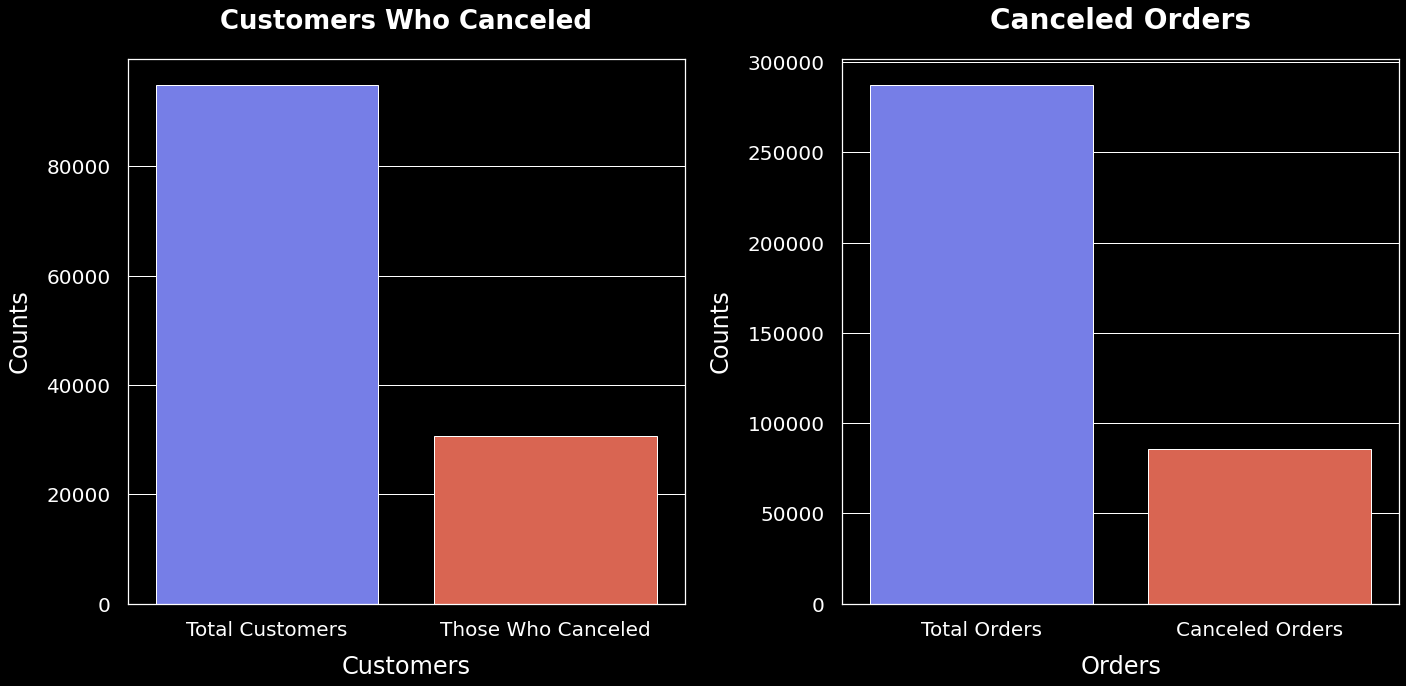

In [ ]:
canceled = amazon_sales_df[amazon_sales_df['Status'].str.contains('canceled')]
a = amazon_sales_df['Customer_Id'].nunique() + canceled['Customer_Id'].nunique()
b = canceled ['Customer_Id'].nunique()

data = {'Customers': ['Total Customers', 'Those Who Canceled'], 'Customer_Counts': [a, b]}

customer_counts = pd.DataFrame.from_dict(data)


c = amazon_sales_df['Order_Id'].nunique() + canceled['Order_Id'].nunique()
d = canceled['Order_Id'].nunique()

data = {'Orders': ['Total Orders', 'Canceled Orders'], 'Order_Counts': [c, d]}

order_counts = pd.DataFrame.from_dict(data)


sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : True})

fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.barplot(ax = ax[0], data = customer_counts, x=customer_counts.Customers, y=customer_counts.Customer_Counts, palette = sns.set_palette(sns.color_palette(['#636efa','#ef553b'])))
sns.barplot(ax = ax[1], data = order_counts, x=order_counts.Orders, y=order_counts.Order_Counts, palette = sns.set_palette(sns.color_palette(['#636efa','#ef553b'])))

ax[0].set_title("Customers Who Canceled", fontsize = 26, pad = 30, color='white', fontweight='bold')
ax[0].set_xlabel("Customers", fontsize = 24, labelpad = 15, color='white')
ax[0].set_ylabel("Counts", fontsize = 24, labelpad = 15, color='white')
ax[0].tick_params(axis='x', colors='white', labelsize=20)
ax[0].tick_params(axis='y', colors='white', labelsize=20)


ax[1].set_title("Canceled Orders", fontsize = 28, pad = 30, color='white', fontweight='bold')
ax[1].set_xlabel("Orders", fontsize = 24, labelpad = 15, color='white')
ax[1].set_ylabel("Counts", fontsize = 24, labelpad = 15, color='white')
ax[1].tick_params(axis='x', colors='white', labelsize=20)
ax[1].tick_params(axis='y', colors='white', labelsize=20);

plt.tight_layout(pad=2);



In [ ]:
canceled = canceled.dropna()
fig10 = px.treemap(canceled, 
                 path=['Category'], template='plotly_dark')
fig10.update_traces(textfont_color='yellow',textfont_size=16, selector=dict(type='treemap'))
fig10.update_layout({"title": 'Canceled Orders by Category',
                   "showlegend": False}, 
                   title_x =0.5,
                   width=1000,
                   height=600,
                   yaxis = dict(tickformat = "digits"),
                   template="plotly_dark",
                   title_font_family="Sitka Small",
                   title_font_size= 35,
                   )
fig10.show()



Most of the orders were canceled from Mobile & tablets, Appliances and Other products

## **Completed Orders**

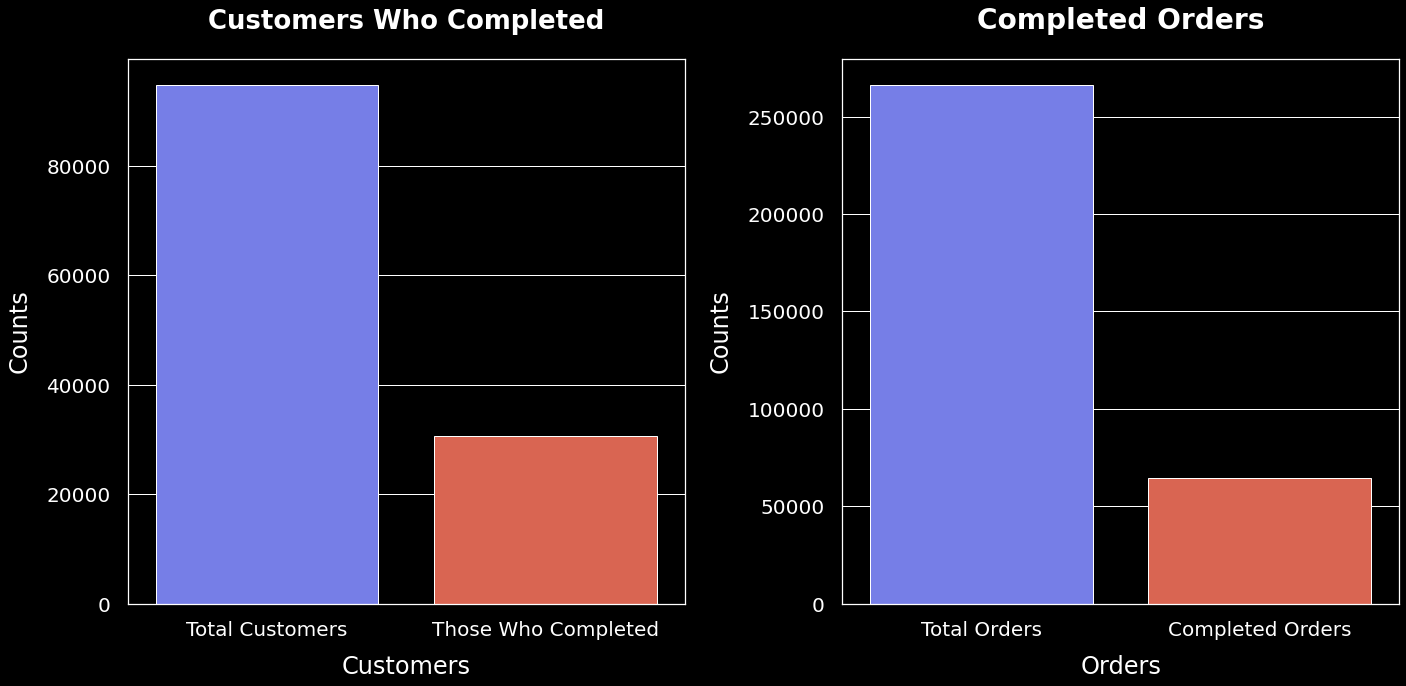

In [ ]:
completed = amazon_sales_df[amazon_sales_df['Status'].str.contains('complete')]
a = amazon_sales_df['Customer_Id'].nunique() + completed ['Customer_Id'].nunique()
b = completed ['Customer_Id'].nunique()

data = {'Customers': ['Total Customers', 'Those Who Completed'], 'Customer_Counts': [a, b]}

customer_counts = pd.DataFrame.from_dict(data)


c = amazon_sales_df['Order_Id'].nunique() + completed['Order_Id'].nunique()
d = completed['Order_Id'].nunique()

data = {'Orders': ['Total Orders', 'Completed Orders'], 'Order_Counts': [c, d]}

order_counts = pd.DataFrame.from_dict(data)


sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : True})

fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.barplot(ax = ax[0], data = customer_counts, x=customer_counts.Customers, y=customer_counts.Customer_Counts, palette = sns.set_palette(sns.color_palette(['#636efa','#ef553b'])))
sns.barplot(ax = ax[1], data = order_counts, x=order_counts.Orders, y=order_counts.Order_Counts, palette = sns.set_palette(sns.color_palette(['#636efa','#ef553b'])))

ax[0].set_title("Customers Who Completed", fontsize = 26, pad = 30, color='white', fontweight='bold')
ax[0].set_xlabel("Customers", fontsize = 24, labelpad = 15, color='white')
ax[0].set_ylabel("Counts", fontsize = 24, labelpad = 15, color='white')
ax[0].tick_params(axis='x', colors='white', labelsize=20)
ax[0].tick_params(axis='y', colors='white', labelsize=20)


ax[1].set_title("Completed Orders", fontsize = 28, pad = 30, color='white', fontweight='bold')
ax[1].set_xlabel("Orders", fontsize = 24, labelpad = 15, color='white')
ax[1].set_ylabel("Counts", fontsize = 24, labelpad = 15, color='white')
ax[1].tick_params(axis='x', colors='white', labelsize=20)
ax[1].tick_params(axis='y', colors='white', labelsize=20);

plt.tight_layout(pad=2);

In [ ]:
completed = completed.dropna()
fig11 = px.treemap(completed, 
                 path=['Category'], template='plotly_dark')
fig11.update_traces(textfont_color='yellow',textfont_size=16, selector=dict(type='treemap'))
fig11.update_layout({"title": 'Completed Orders by Category',
                   "showlegend": False}, 
                   title_x =0.5,
                   width=1000,
                   height=600,
                   yaxis = dict(tickformat = "digits"),
                   template="plotly_dark",
                   title_font_family="Sitka Small",
                   title_font_size= 35,
                   )
fig11.show()


Most of the orders were completed from Mobile & tablets, Men's Fashion and Appliances and Women's Fashion

## **Product Category**

In [ ]:
# Get the count of category
amazon_sales_df.groupby(['Category']).size()
value_counts_category= amazon_sales_df['Category'].value_counts()
value_counts_category

Mobiles & Tablets     61761
Men's Fashion         40713
Appliances            33034
Women's Fashion       28334
Others                26108
Beauty & Grooming     17899
Entertainment         17352
Superstore            15024
Home & Living         13990
Health & Sports        8421
Computing              8110
Soghaat                7250
Kids & Baby            6492
School & Education     1090
Books                   814
Name: Category, dtype: int64

In [ ]:
category_counts = amazon_sales_df['Category'].value_counts().sort_values(ascending=False)

fig12 = go.Figure(go.Bar(
    x=category_counts.index,
    y=category_counts,
    marker=dict(
        color=px.colors.qualitative.Light24,
    )))
fig12.update_layout({"title": 'No of Orders by Order Category',
                   "xaxis": {"title":"Product Category"},
                   "yaxis": {"title":" No of Orders"},
                   "showlegend": False}, 
                   title_x =0.5,
                   width=1000,
                   height=600,
                   yaxis = dict(tickformat = "digits"),
                   template="plotly_dark",
                   title_font_family="Sitka Small",
                   title_font_size= 35,
                   )
fig12.update_xaxes(title_font_family="Sitka Small", title_font_size= 20,tickangle=35)
fig12.update_yaxes(title_font_family="Sitka Small", title_font_size= 20)


fig12.show()

### **Product Category by Region**

In [ ]:
amazon_sales_df.groupby(['Region','Category']).size()

Region     Category          
Midwest    Appliances             8983
           Beauty & Grooming      5044
           Books                   180
           Computing              2188
           Entertainment          4715
           Health & Sports        4159
           Home & Living          3735
           Kids & Baby            1803
           Men's Fashion         11277
           Mobiles & Tablets     16592
           Others                 7518
           School & Education      293
           Soghaat                2128
           Superstore             4973
           Women's Fashion        7711
Northeast  Appliances             5574
           Beauty & Grooming      3297
           Books                   144
           Computing              1449
           Entertainment          2946
           Health & Sports         940
           Home & Living          2515
           Kids & Baby            1226
           Men's Fashion          7294
           Mobiles & Tablets     1

In [ ]:
fig13 = plt.figure(figsize=(4,8))
fig13 = px.bar(data_frame=amazon_sales_df.groupby(by=["Region", "Category"]).size().sort_values(ascending=False).reset_index(name="Counts"), 
       x="Region", y="Counts", color="Category", barmode="group",
       title = "Product Category By Region")
 

fig13.update_layout(
    font_family="Courier New",
    font_color="white",
    title_x =0.5,
    legend_title_font_color="white",
    legend_title_font_size = 25,
    autosize=False,
    width=1000,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    legend=dict(
        bordercolor="white",
        borderwidth=2,
        bgcolor= 'black'
    ),
    yaxis = dict(tickformat = "digits"),
    template="plotly_dark",
    title_font_family="Sitka Small",
    title_font_size= 35,
)
fig13.update_xaxes(title_font_family="Sitka Small", title_font_size= 20)
fig13.update_yaxes(title_font_family="Sitka Small", title_font_size= 20)
fig13.show()

<Figure size 288x576 with 0 Axes>

### **Product Category by Gender**

In [ ]:
amazon_sales_df.groupby(['Gender','Category']).size()

Gender  Category          
Female  Appliances            16586
        Beauty & Grooming      8959
        Books                   377
        Computing              3888
        Entertainment          8676
        Health & Sports        2872
        Home & Living          7014
        Kids & Baby            3306
        Men's Fashion         20150
        Mobiles & Tablets     30963
        Others                12340
        School & Education      533
        Soghaat                3721
        Superstore             7077
        Women's Fashion       13746
Male    Appliances            16448
        Beauty & Grooming      8940
        Books                   437
        Computing              4222
        Entertainment          8676
        Health & Sports        5549
        Home & Living          6976
        Kids & Baby            3186
        Men's Fashion         20563
        Mobiles & Tablets     30798
        Others                13768
        School & Education      557
 

In [ ]:
fig14 = plt.figure(figsize=(4,8))
fig14 = px.bar(data_frame=amazon_sales_df.groupby(by=["Category", "Gender"]).size().sort_values(ascending=False).reset_index(name="Counts"), 
       x="Gender", y="Counts", color="Category", barmode="group",
       title = "Count of each category with Gender"
) 

fig14.update_layout(
    font_family="Courier New",
    font_color="white",
    title_x =0.5,
    legend_title_font_color="white",
    legend_title_font_size = 25,
    autosize=False,
    width=1000,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    legend=dict(
        bordercolor="white",
        borderwidth=2,
        bgcolor= 'black'
    ),
    yaxis = dict(tickformat = "digits"),
    template="plotly_dark",
    title_font_family="Sitka Small",
    title_font_size= 35,
)
fig14.update_yaxes(title_font_family="Sitka Small", title_font_size= 20)
fig14.show()

<Figure size 288x576 with 0 Axes>

##**Geo Locations**
**(Region / State / County / City)**

---

### ***Region***

In [ ]:
amazon_sales_df.groupby('Region').size()

Region
Midwest       81299
Northeast     50531
South        103482
West          51080
dtype: int64

In [ ]:
fig15 = px.pie(amazon_sales_df, values='Total', names='Region',color_discrete_sequence=px.colors.qualitative.Pastel)
fig15.update_layout({"title": 'Region counts'}, 
                   title_x =0.5,
                   width=800,
                   height=500,
                   legend_title="Region",
                   legend_title_font_color="white",
                   legend_title_font_size = 25,
                   template="plotly_dark",
                   title_font_family="Sitka Small",
                   title_font_size= 35,
                    legend=dict(
                                bordercolor="white",
                                borderwidth=2,
                                bgcolor= 'black'
                                )
              )
fig15.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 3)))
                   
fig15.show()

### ***State***

**Total No of Orders by each State**

In [ ]:
sales_for_state = amazon_sales_df.groupby(['State']).agg({'Total':'count'})
sales_for_state

Total
State       
AK      2509
AL      5252
AR      4864
AZ      3712
CA     17130
CO      5036
CT      3037
DC      1865
DE       715
FL     10538
GA      6346
HI       800
IA      8170
ID      2348
IL     12628
IN      6738
KS      4879
KY      7397
LA      4709
MA      5001
MD      4163
ME      2857
MI      7137
MN      8020
MO      8876
MS      3565
MT      3122
NC      7549
ND      2350
NE      3775
NH      1695
NJ      4984
NM      2987
NV      1725
NY     15567
OH     10204
OK      5253
OR      3179
PA     14394
RI       492
SC      3771
SD      2993
TN      4981
TX     17510
UT      2650
VA      8557
VT      2504
WA      4155
WI      5529
WV      6447
WY      1727

In [ ]:
states_counts = amazon_sales_df['State'].value_counts().sort_values(ascending=False)

fig16 = go.Figure(go.Bar(
    x=states_counts.index,
    y=states_counts,
    marker=dict(
        color='limegreen',
        line=dict(
            color='white',  
            width=3)
            )
    ))
fig16.update_layout({"title": 'No of Orders by Order Category',
                   "xaxis": {"title":"Product Category"},
                   "yaxis": {"title":" No of Orders"},
                   "showlegend": False}, 
                   title_x =0.5,
                   width=1000,
                   height=600,
                   yaxis = dict(tickformat = "digits"),
                   template="plotly_dark",
                   title_font_family="Sitka Small",
                   title_font_size= 35,
                   )
fig16.update_xaxes(title_font_family="Sitka Small", title_font_size= 20,tickangle=35)
fig16.update_yaxes(title_font_family="Sitka Small", title_font_size= 20)


fig16.show()

 **Total sales by State**


In [ ]:
total_for_state = amazon_sales_df.groupby(['State']).agg({'Total':'sum'})
total_for_state

Total
State              
AK     4.117533e+06
AL     7.990469e+06
AR     7.801897e+06
AZ     6.447624e+06
CA     2.907911e+07
CO     7.810320e+06
CT     4.104645e+06
DC     2.790140e+06
DE     1.032720e+06
FL     1.761677e+07
GA     1.043193e+07
HI     1.320882e+06
IA     1.306131e+07
ID     3.424274e+06
IL     1.819387e+07
IN     1.267757e+07
KS     7.087068e+06
KY     1.435224e+07
LA     7.847545e+06
MA     8.636702e+06
MD     6.445446e+06
ME     5.885768e+06
MI     1.083583e+07
MN     1.106539e+07
MO     1.607976e+07
MS     1.186865e+07
MT     6.314639e+06
NC     1.319334e+07
ND     4.744519e+06
NE     5.895362e+06
NH     2.799132e+06
NJ     1.027973e+07
NM     4.600247e+06
NV     2.696423e+06
NY     2.311286e+07
OH     1.628339e+07
OK     8.786302e+06
OR     5.037243e+06
PA     2.094874e+07
RI     6.296065e+05
SC     4.848368e+06
SD     4.074561e+06
TN     9.029432e+06
TX     3.122581e+07
UT     4.072391e+06
VA     1.595599e+07
VT     5.676439e+06
WA     7.708826e+06
WI     8.507117e+06
WV     1.090462e+07
WY     2.149571e+06

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/DSC3263 Group_4/Project/data/USA States")
os.listdir()

Mounted at /content/drive


['usa_population_2019.csv',
 'us-states.json',
 'Amazon Sales FY2020-21.csv',
 'by-month.png']

In [ ]:
usa_states = json.load(open('/content/drive/MyDrive/DSC3263 Group_4/Project/data/USA States/us-states.json','r'))

fig17 = px.choropleth_mapbox(total_for_state, geojson=usa_states, locations=total_for_state.index, color=total_for_state['Total'],
                           color_continuous_scale="Viridis",
                           range_color=(0, total_for_state['Total'].max()),
                           mapbox_style="carto-positron",
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5
                          )


fig17.update_layout(margin={"r":0,"t":0,"l":0,"b":0},width=1200,
                   height=500,dragmode=False)


fig17.show()

**No of Orders by Region and State**

In [ ]:
amazon_sales_df.groupby(['Region', 'State']).size()

Region     State
Midwest    IA        8170
           IL       12628
           IN        6738
           KS        4879
           MI        7137
           MN        8020
           MO        8876
           ND        2350
           NE        3775
           OH       10204
           SD        2993
           WI        5529
Northeast  CT        3037
           MA        5001
           ME        2857
           NH        1695
           NJ        4984
           NY       15567
           PA       14394
           RI         492
           VT        2504
South      AL        5252
           AR        4864
           DC        1865
           DE         715
           FL       10538
           GA        6346
           KY        7397
           LA        4709
           MD        4163
           MS        3565
           NC        7549
           OK        5253
           SC        3771
           TN        4981
           TX       17510
           VA        8557
           WV        

In [ ]:
amazon_sales_df['State'].unique()

array(['OK', 'FL', 'ND', 'HI', 'WY', 'GA', 'TN', 'RI', 'IL', 'KY', 'AZ',
       'AR', 'MS', 'NE', 'NJ', 'WV', 'CA', 'MO', 'LA', 'TX', 'MI', 'PA',
       'VA', 'MN', 'MT', 'ME', 'NM', 'IA', 'OH', 'SC', 'NC', 'UT', 'IN',
       'AL', 'VT', 'NY', 'SD', 'CT', 'OR', 'NH', 'CO', 'DC', 'MD', 'ID',
       'KS', 'NV', 'AK', 'WA', 'MA', 'WI', 'DE'], dtype=object)

In [ ]:
fig18 = px.histogram(x = amazon_sales_df['Region'].tolist(), color = amazon_sales_df['State'].tolist())

fig18.update_layout({"title": 'No of Orders By Region and State',
                   "xaxis": {"title":"Region"},
                   "yaxis": {"title":"No of Orders"}}, 
                   title_x =0.5,
                   width=1000,
                   height=600,
                   yaxis = dict(tickformat = "digits"),
                   legend_title="State",
                   template="plotly_dark",
                   title_font_family="Sitka Small",
                   title_font_size= 35,
                   legend=dict(
                          bordercolor="white",
                          borderwidth=2,
                           bgcolor= 'black'
                               ),
                   legend_title_font_color="white",
                   legend_title_font_size = 25,
                   )
fig18.update_xaxes(title_font_family="Sitka Small", title_font_size= 20)
fig18.update_yaxes(title_font_family="Sitka Small", title_font_size= 20)
fig18.show()

 **Total value  by Region and State**

In [ ]:
df_places = amazon_sales_df.groupby(['Region', 'State']).sum().reset_index()
df_places.sort_values(by='Total', ascending=False, inplace=True)
df_places.head()

Region State      Item_Id  Quantity_Ordered         Price  \
35      South    TX  12912658159             50913  1.575835e+07   
40       West    CA  12606718484             49832  1.520294e+07   
17  Northeast    NY  11597269126             48067  1.174776e+07   
18  Northeast    PA  10696115409             41228  1.078970e+07   
1     Midwest    IL   9625309873             37685  9.086972e+06   

           Value  Discount_Amount         Total  Customer_Id      Year  \
35  3.248327e+07     1.257458e+06  3.122581e+07   1253527443  35380723   
40  3.050559e+07     1.426480e+06  2.907911e+07   1196664366  34612989   
17  2.413971e+07     1.026847e+06  2.311286e+07   1097878847  31455099   
18  2.189092e+07     9.421732e+05  2.094874e+07   1047915302  29084735   
1   1.911286e+07     9.189922e+05  1.819387e+07    919569285  25517255   

    Ref_Number     Age    Zip_Code  Discount_Percent  
35  9608249853  807515  1361296301     100142.553296  
40  9342379743  776701  1600955339     111344.971622  
17  8674832850  722706   195083324      96190.307717  
18  7793912641  674052   246656206      86041.542482  
1   7309810400  593715   773632172      65813.713092

In [ ]:
fig19 = px.sunburst(data_frame=df_places, path=['Region', 'State'], values='Total', title = 'Total Amount By Region and State')

fig19.update_layout(
                   title_x =0.5,
                   width=1000,
                   height=600,
                   yaxis = dict(tickformat = "digits"),
                   template='plotly_dark',
                   title_font_family="Sitka Small",
                   title_font_size= 35,
                   )


fig19.show()

### ***City***

In [ ]:
amazon_sales_df.groupby('City').size()

City
Aaron            2
Aaronsburg       6
Abbeville       30
Abbotsford       6
Abbott          25
                ..
Zullinger        2
Zumbro Falls    13
Zuni            17
Zwingle         14
Zwolle           9
Length: 15892, dtype: int64

There are total 15892 cities.

**Top 10 Cities with most orders**

In [ ]:
top_cities = amazon_sales_df.groupby('City').size().reset_index().rename(columns={0: 'Total'}).sort_values('Total', ascending=False).head(10)
fig20 = px.pie(top_cities, values='Total', names='City', color_discrete_sequence=px.colors.sequential.RdBu, title='Top 10 ordering cities')
fig20.update_layout(
                   title_x =0.5,
                   width=800,
                   height=500,
                   legend_title = "City",
                   legend_title_font_color="white",
                   legend_title_font_size = 25,
                   template="plotly_dark",
                   title_font_family="Sitka Small",
                   title_font_size= 35,
                    legend=dict(
                                bordercolor="white",
                                borderwidth=2,
                                bgcolor= 'black'
                                )
              )
fig20.update_traces(textposition='inside', textinfo='percent', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 3)))
fig20.show()

**Top 10 Discounted Cities with most orders**

In [ ]:
discounted_cities = amazon_sales_df[amazon_sales_df['Discount_Amount'] != 0]

top_dis_cities = discounted_cities.groupby('City').size().reset_index().rename(columns={0: 'Total'}).sort_values('Total', ascending=False).head(10)
fig21 = px.pie(top_dis_cities, values='Total', names='City', color_discrete_sequence=px.colors.sequential.BuGn_r, title='Top 10 ordering in discounted cities')
fig21.update_layout(
                   title_x =0.5,
                   width=800,
                   height=500,
                   legend_title = "City",
                   legend_title_font_color="white",
                   legend_title_font_size = 25,
                   template="plotly_dark",
                   title_font_family="Sitka Small",
                   title_font_size= 35,
                    legend=dict(
                                bordercolor="white",
                                borderwidth=2,
                                bgcolor= 'black'
                                )
              )
fig21.update_traces(textposition='inside', textinfo='percent', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 3)))
fig21.show()

***County***

In [ ]:
amazon_sales_df.groupby(['County']).size()

County
Aaron             2
Abbeville         5
Acadia           64
Accomack        303
Ada             455
               ... 
Zeona             7
Zephyrhills      11
Ziebach          24
Zim               6
Zumbro Falls     12
Length: 2551, dtype: int64

***Zip Code***

In [ ]:
amazon_sales_df.groupby(['Zip_Code']).size()

Zip_Code
210       1
212       4
214       1
215       6
401       3
         ..
99926     4
99927    12
99928    42
99929     1
99950     1
Length: 33773, dtype: int64

# **Contingency Tables**
---

In [ ]:
crosstab3= pd.crosstab(amazon_sales_df.Gender,amazon_sales_df.Region, margins=True)
print(crosstab3)

Region  Midwest  Northeast   South   West     All
Gender                                           
Female    38097      24480   51513  26118  140208
Male      43202      26051   51969  24962  146184
All       81299      50531  103482  51080  286392


In [ ]:
crosstab4= pd.crosstab(amazon_sales_df.Gender,amazon_sales_df.Category, margins=True)
print(crosstab4)

Category  Appliances  Beauty & Grooming  Books  Computing  Entertainment  \
Gender                                                                     
Female         16586               8959    377       3888           8676   
Male           16448               8940    437       4222           8676   
All            33034              17899    814       8110          17352   

Category  Health & Sports  Home & Living  Kids & Baby  Men's Fashion  \
Gender                                                                 
Female               2872           7014         3306          20150   
Male                 5549           6976         3186          20563   
All                  8421          13990         6492          40713   

Category  Mobiles & Tablets  Others  School & Education  Soghaat  Superstore  \
Gender                                                                         
Female                30963   12340                 533     3721        7077   
Male              

##**Relationship in Gender & Discount**

In [ ]:
amazon_sales_df['Is_Discounted'] = np.where(amazon_sales_df['Discount_Amount'] > 0 , True, False)

In [ ]:
crosstab5= pd.crosstab(amazon_sales_df.Gender,amazon_sales_df.Is_Discounted)
print(crosstab5)

Is_Discounted   False   True
Gender                      
Female          98051  42157
Male           102607  43577


In [ ]:
# Performing Chi-sq test
ChiSqResult = chi2_contingency(crosstab5)

# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.1331762367087423


**H0: The variables are not correlated with each other**. This is the H0 used in the Chi-square test.

In the above , the **P-value came higher than 0.05. do not reject H0. Which means the variables are not correlated with each other.**

##**Relationship in Category & Discount**

In [ ]:
crosstab6= pd.crosstab(amazon_sales_df.Category,amazon_sales_df.Is_Discounted)
print(crosstab6)

Is_Discounted       False   True
Category                        
Appliances          17636  15398
Beauty & Grooming   13885   4014
Books                 779     35
Computing            4760   3350
Entertainment        7360   9992
Health & Sports      7318   1103
Home & Living       10987   3003
Kids & Baby          5458   1034
Men's Fashion       33593   7120
Mobiles & Tablets   34365  27396
Others              25695    413
School & Education    994     96
Soghaat              6050   1200
Superstore           9234   5790
Women's Fashion     22544   5790


In [ ]:
c, p, dof, expected = chi2_contingency(crosstab6) 
# Print the p-value
print(p)

0.0


In [ ]:
stats.chi2_contingency(crosstab6)

(35905.17730099592, 0.0, 14, array([[23144.97741557,  9889.02258443],
        [12540.77467946,  5358.22532054],
        [  570.3218386 ,   243.6781614 ],
        [ 5682.19915361,  2427.80084639],
        [12157.52400905,  5194.47599095],
        [ 5900.09852929,  2520.90147071],
        [ 9801.96870024,  4188.03129976],
        [ 4548.5618872 ,  1943.4381128 ],
        [28525.20026397, 12187.79973603],
        [43272.29370234, 18488.70629766],
        [18292.33729992,  7815.66270008],
        [  763.6987765 ,   326.3012235 ],
        [ 5079.64782536,  2170.35217464],
        [10526.4315763 ,  4497.5684237 ],
        [19851.96434258,  8482.03565742]]))

In [ ]:
fig22 = px.imshow(crosstab5, color_continuous_scale='YlGnBu')
fig22.update_layout(
    {"title": 'Relationship between Category and Discount'},
    xaxis_title="Is Discounted",
    yaxis_title="Gender",
    font=dict(
        family="Arial, monospace",
        size=18,
        color="#7f7f7f"
    ),
    template="plotly_dark",
    font_color="white",
    title_x =0.5,
    width=1000,
    height=600,
    title_font_family="Sitka Small",
    title_font_size= 35, 

)
fig22.update_xaxes(title_font_family="Sitka Small", title_font_size= 20)
fig22.update_yaxes(title_font_family="Sitka Small", title_font_size= 20)
fig22.show()

The first value (35905.17730099592) is the Chi-square value, followed by the p-value ( 0.0), then comes the degrees of freedom (14), and lastly it outputs the expected frequencies as an array. Since all of the expected frequencies are greater than 5, the chi2 test results can be trusted.**We can reject the null hypothesis as the p-value is less than 0.05. Thus, the results indicate that there is a relationship between Is_Discounted and Category**

In [ ]:
fig23 = plt.figure(figsize=(4,8))
fig23 = px.bar(data_frame=amazon_sales_df.groupby(by=["Category", "Is_Discounted"]).size().sort_values(ascending=False).reset_index(name="Counts"), 
       x="Category", y="Counts", color="Is_Discounted", barmode="group",
       title = "Graph about category And discount"
) 

fig23.update_layout(
    font_family="Courier New",
    font_color="white",
    title_x =0.5,
    legend_title_font_color="white",
    legend_title_font_size = 25,
    autosize=False,
    width=1000,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    legend=dict(
        bordercolor="white",
        borderwidth=2,
        bgcolor= 'black'
    ),
    yaxis = dict(tickformat = "digits"),
    template="plotly_dark",
    title_font_family="Sitka Small",
    title_font_size= 35,
)
fig23.update_yaxes(title_font_family="Sitka Small", title_font_size= 20)
fig23.show()

<Figure size 288x576 with 0 Axes>

##**Relationship between Quantity_Ordered & Discount_amount**

In [ ]:
amazon_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_Id          286392 non-null  object        
 1   Order_Date        286392 non-null  datetime64[ns]
 2   Status            286392 non-null  object        
 3   Item_Id           286392 non-null  int64         
 4   SKU               286392 non-null  object        
 5   Quantity_Ordered  286392 non-null  int64         
 6   Price             286392 non-null  float64       
 7   Value             286392 non-null  float64       
 8   Discount_Amount   286392 non-null  float64       
 9   Total             286392 non-null  float64       
 10  Category          286392 non-null  object        
 11  Payment_Method    286392 non-null  object        
 12  By_St             286392 non-null  object        
 13  Customer_Id       286392 non-null  int64         
 14  Year

In [ ]:
# Convert dataframe into series
list1 = amazon_sales_df['Quantity_Ordered']
list2 = amazon_sales_df['Discount_Amount']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.021


***There is a weekly positive correlation between Quantity_Ordered and discount_amount variables***

In [ ]:
pearsonr(list1, list2)

(0.02124350511375496, 5.9106893352017615e-30)

In [ ]:
value_counts_status

canceled          112166
complete           88968
received           51775
order_refunded     25713
refund              3820
cod                 2851
paid                 756
closed               176
payment_review        57
pending               48
processing            33
holded                25
pending_paypal         4
Name: Status, dtype: int64